# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.


**NOTE: DO NOT change the "grader" functions or code snippets written by us.Please add your code in the suggested locations.**

Ethics Code:
1. You are welcome to read up online resources to implement the code. 
2. You can also discuss with your classmates on the implmentation over Slack.
3. But, the code you write and submit should be yours ONLY. Your code will be compared against other stduents' code and online code snippets to check for plagiarism. If your code is found to be plagiarised, you will be awarded zero-marks for all assignments, which have a 10% weightage in the final marks for this course.

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open(r"C:\Users\User\Downloads\Backpropagation_from_Scratch_Assignment_Data.pkl", 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

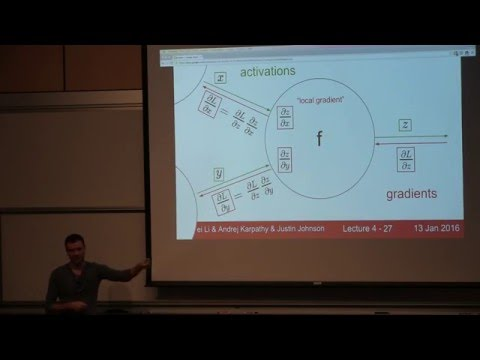

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [3]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value 
    sigmoid_z = 1 / (1 + np.exp(-z))
    return sigmoid_z

In [4]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [31]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)
        print(part_1)
        
        val_2= part_1 + w[6]
        part_2 = np.tanh(val_2)
        print(part_2)
        
        val_3 = ((np.sin(w[2]*x[2])) * (w[3]*x[3]+w[4]*x[4])) + w[7]
        part_3 = sigmoid(val_3)
        print(part_3)
        
        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        
        y_hat = (part_3*w[8]) + part_2
        loss = (y - y_hat)**2
        print(loss)
        dy_pred = (-2 * (y - y_hat))
        print(dy_pred)
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = loss
        forward_dict['dy_pred'] = dy_pred
        
        return forward_dict

In [33]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3) 
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

1.1272967040973583
0.8417934192562146
0.5279179387419721
0.9298048963072919
-1.9285278284819143


True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [34]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    dy_pred = forward_dict['dy_pred']
    
    dw9 = round(dy_pred * forward_dict['sigmoid'],6)
    dw8 = round(dy_pred * forward_dict['sigmoid'] * w[8] * (1 - forward_dict['sigmoid']),6) 
    dw7 = round(dy_pred * (1 - (forward_dict['tanh']**2)),6) 
    dw6 = round(dy_pred * (1 - (forward_dict['tanh']**2)) * forward_dict['exp'],6)
    dw5 = round(dw8 * (x[4] * np.sin(w[2]* x[2])),6) 
    dw4 = round(dw8 * (x[3] * np.sin(w[2]* x[2])), 6)
    dw3 = round(dw8 * np.cos(w[2]*x[2]) * x[2] * (w[3]*x[3] + w[4]*x[4]), 6)
    print(dw3)
    dw2 = round(dw6 * 2 * (w[0]*x[0]+w[1]*x[1]) * x[1],6)
    dw1 = round(dw6 * 2 * (w[0]*x[0]+w[1]*x[1]) * x[0],6)
    
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    backward_dict={}
    backward_dict['dw9'] = dw9 
    backward_dict['dw8'] = dw8 
    backward_dict['dw7'] = dw7 
    backward_dict['dw6'] = dw6 
    backward_dict['dw5'] = dw5 
    backward_dict['dw4'] = dw4 
    backward_dict['dw3'] = dw3 
    backward_dict['dw2'] = dw2 
    backward_dict['dw1'] = dw1 
    
    
    return backward_dict

In [35]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

1.1272967040973583
0.8417934192562146
0.5279179387419721
0.9298048963072919
-1.9285278284819143
-0.005625


True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [36]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(reversed(list(backward_dict.values()))) #2.12491016e-07
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    approx_gradients_list=[]
    for i in range(len(w)):
        # add a small value to weight wi, and then find the values of loss_plus with the updated weights
        w_plus=w.copy()
        w_plus[i] = w_plus[i]+eps
        forward_dict_plus = forward_propagation(x,y,w_plus)
        loss_plus   = forward_dict_plus['loss']
        
        # subtract a small value to weight wi, and then find the values of loss_minus with the updated weights
        # please write your code below to calcualte loss_minus
    
        w_minus=w.copy()
        w_minus[i] = w_minus[i]-eps
        forward_dict_minus = forward_propagation(x,y,w_minus)
        loss_minus   = forward_dict_minus['loss']
        
        # now we will calualte approximate gradient for a particular weight
        approx_gradient = (loss_plus-loss_minus)/(2*eps)
        approx_gradients_list.append(approx_gradient)
    
    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    print(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    print(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    
    return gradient_check_value
    

In [37]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value < 10**-1))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-6
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

1.0011710528587492
0.7649388159607136
0.5056058563651843
1.18234179770813
-2.1747108292443205
4e-06
1.0011710657874795
0.7649388213244379
0.5056058563651843
1.182341786043581
-2.174710818516872
1.00117103993334
0.7649388105983671
0.5056058563651843
1.1823418093696831
-2.1747108399690136
1.0011710540633683
0.7649388164604722
0.5056058563651843
1.1823417966213
-2.1747108282448036
1.0011710516541588
0.7649388154609669
0.5056058563651843
1.182341798794935
-2.1747108302438143
1.0011710528587492
0.7649388159607136
0.5056058562391992
1.1823417977116821
-2.174710829247587
1.0011710528587492
0.7649388159607136
0.5056058564911693
1.1823417977045785
-2.174710829241054
1.0011710528587492
0.7649388159607136
0.5056058567727392
1.1823417976966397
-2.1747108292337534
1.0011710528587492
0.7649388159607136
0.5056058559576294
1.1823417977196207
-2.174710829254888
1.0011710528587492
0.7649388159607136
0.5056058564533569
1.182341797705644
-2.1747108292420343
1.0011710528587492
0.7649388159607136
0.50560585

True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

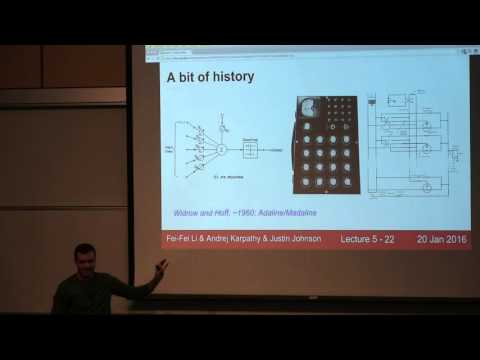

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-10):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>



**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

###<font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [38]:
def vanilla_update(w_vanilla,X,Y,learning_rate,epochs):
    mean_loss=[]
    for e in range(epochs):
        loss_per_datapoint=0
        for i in range(len(X)):
            #calculate forward propogation
            forward_dict = forward_propagation(X[i], y[i], w_vanilla)
            #adding loss for each datapoint
            loss_per_datapoint+=forward_dict['loss']    
            #calculating gradient dict using backward propogation
            gradients = backward_propagation(X[i],y[i],w_vanilla,forward_dict)   
            #getting the values of gradients from dictionary
            dw = np.array(list(reversed(list(gradients.values()))))

            #update w according to vanilla update => w_new = w_old - learning_rate*dw
            #you have to write your code here to update weights according to vanilla optimizer
            w_vanilla = w_vanilla - (learning_rate * dw)
            
        # we are appending the average loss for all the datapoints
        mean_loss.append(loss_per_datapoint/len(X))
    return np.array(mean_loss)

1.0338710688565633
0.775286746912383
0.5003755088696394
1.159341465309285
-2.153454401940552
4e-06
1.0347751246369545
0.775989154208494
0.5003787567923673
1.0725643296965137
-2.07129363412966
1.3e-05
1.0356701278043086
0.776672149998878
0.5003806645538589
1.071903280858687
-2.0706552401195975
1.4e-05
1.0366624790076757
0.7773908748894302
0.5003796626388987
0.8101781632192536
-1.800197948248196
-5e-06
1.037370591168292
0.777952248712031
0.5003815538899619
0.8083571347347067
-1.7981736676246893
-6e-06
1.0381110207147006
0.7785241798320617
0.5003835443911346
0.8065200901387622
-1.7961292716714599
-6e-06
1.0388310056675185
0.7790858401535607
0.5003897229319726
1.1535305990302176
-2.148050836484293
2.6e-05
1.0398115403581787
0.7798020029721696
0.500392342257774
1.1506866181167632
-2.1454012381060688
2.8e-05
1.0407468951955747
0.7804971310126204
0.5003951023374252
1.1484156025628514
-2.143283091486378
2.9e-05
1.0415803266041834
0.7811493776283277
0.5003980036713862
1.1437625695625513
-2.1389

0.8543773645608213
0.5023359311066512
0.844980397189198
-1.8384563059145007
0.000684
1.1647074204004397
0.8545028189513673
0.5023698745945413
0.965906119686958
-1.9656104595641102
0.001674
1.1660649226862967
0.8550113932004728
0.5023918440021126
0.963924632677371
-1.963593270183386
0.001682
1.1662543460388621
0.8552042618159089
0.5024113599366845
1.034353050373263
-2.0340629787430506
0.001566
1.1670352451897827
0.8555604045060721
0.5024343457310003
1.0325765460534753
-2.032315473595057
0.001574
1.1677121045503873
0.8558874588618222
0.5024355102046641
0.5856880205876069
-1.5306051360002775
-2e-05
1.167772954003347
0.8560131718493977
0.5024529935400818
0.5847977153661817
-1.529441356007064
-2e-05
1.168259063358663
0.8562521269138983
0.5024705371180299
0.5821833442262446
-1.5260187996564716
-2e-05
1.168839822638646
0.8565155210547124
0.5024881146891189
0.5823013822332802
-1.5261734924094053
-2e-05
1.1696099505527435
0.8568286485604713
0.502505767252222
0.5818718152432409
-1.52561045518604

0.7746471885807295
-1.760280873702523
0.001134
1.2761587532767111
0.897426061895431
0.5076605703776129
0.773346744991423
-1.7588027120645715
0.001136
1.2767199570929866
0.8976017670781059
0.5076953734970369
0.7532500348185034
-1.7357995677133964
0.000786
1.2772734232456007
0.8977747115639181
0.5077326964211861
0.7521512706418597
-1.7345331021826706
0.000787
1.27774179084308
0.8979307435535979
0.5077647640968554
0.7070359273929216
-1.681708568561059
0.000163
1.278361310836391
0.8981137122599796
0.5078011073833907
0.7059782622807005
-1.6804502519035789
0.000164
1.2788960007985484
0.898279838009542
0.5078375130760509
0.704950023936892
-1.67922604069481
0.000164
1.279429935989617
0.8984454195833579
0.5078739816732395
0.7039237842649476
-1.6780033185485035
0.000165
1.2799631178384443
0.8986104595129117
0.5079105129232722
0.7028995362693703
-1.676782080378211
0.000165
1.2804955490598964
0.8987749603731827
0.5079471065763147
0.7018772720471288
-1.6755623199954441
0.000166
1.2810272297439955
0

0.5141868770624425
0.3145843310317043
-1.1217563568470728
-2.1e-05
1.3531373215258358
0.9187105440749641
0.5142200720054754
0.31423019886082454
-1.121124790308063
-2.1e-05
1.3530328018667117
0.9187215148826879
0.5142552364910775
0.4109017876455247
-1.282032429614048
0.000204
1.3537013081462843
0.9188568408155521
0.5142932661343027
0.41059961552157376
-1.2815609474723764
0.000204
1.3539893434620558
0.9189327236279409
0.5143313340803978
0.41004488747547235
-1.2806949480270036
0.000204
1.3542058213082335
0.9189973672328128
0.5143694285881227
0.40950439486438067
-1.279850608257668
0.000204
1.3545223998010114
0.919077464229407
0.5144068062760503
0.36052799850450773
-1.2008796750790776
0.00011
1.355470835171441
0.9192535310347071
0.5144426247285728
0.36131360283614766
-1.2021873445285434
0.00011
1.3553627050646935
0.9192656454675175
0.5144785282113765
0.3608987664239568
-1.201497010273362
0.00011
1.3560306412430163
0.9193978863980184
0.5145156890478745
0.39668868329003715
-1.259664531992605


0.5195015650806492
0.47692342233791357
-1.3811928501667152
0.001621
1.4027061087569497
0.9294546139117822
0.519549707819434
0.4755714746798914
-1.379233808576184
0.001621
1.398714253021126
0.9289349843119652
0.5195828286653664
0.1710069355104852
-0.8270596967824879
-0.000337
1.3990073905320553
0.928990687651571
0.519611727296504
0.1709616819653468
-0.8269502571868439
-0.000337
1.4007803485764259
0.9292486043542167
0.5196406437686265
0.1705774166186603
-0.826020378970544
-0.000337
1.3993672622914155
0.9290708975456347
0.5196695496254016
0.17013248773661624
-0.8249423925017219
-0.000337
1.4003645556506945
0.9292226422728521
0.5196984396249278
0.17020395984013015
-0.8251156521121876
-0.000337
1.4029355975080529
0.9295881774811778
0.5197273574491232
0.16970540603549703
-0.8239063200036689
-0.000337
1.4036276224911084
0.9296973273814602
0.519756254673132
0.16941882419701787
-0.8232103599858736
-0.000337
1.4043099763216123
0.9298049686771073
0.5197851492688573
0.16913385075910542
-0.82251772

0.45545055004759916
-1.3497415308830045
0.001375
1.4377759102538656
0.9364191593190558
0.5249030665667006
0.4548551722835568
-1.3488590323433458
0.001376
1.4384570010360138
0.9365233783396659
0.5249563618519518
0.4541678439880965
-1.3478395215871903
0.001377
1.4381241571684025
0.9365028269234801
0.5250096750274151
0.4536493047227643
-1.3470698641462726
0.001378
1.4390688258889957
0.9366392112174974
0.5250630160672572
0.4529199128747692
-1.3459864975173699
0.001379
1.4394975060802613
0.9367120392874507
0.5251190251184124
0.46416405534673244
-1.3625917295312377
0.001826
1.439848460627447
0.936775496185826
0.5251731003716684
0.4635187715880583
-1.3616442583700903
0.001827
1.4394595575964029
0.9367482857993171
0.5252271974851275
0.4629974943107786
-1.360878384442605
0.001829
1.4403753714959533
0.936880763575896
0.5252813234426648
0.4622594466247686
-1.3597932881504726
0.00183
1.4408974928906755
0.9369648646802089
0.5253354655210252
0.46158795465784397
-1.358805290919702
0.001831
1.44037670

0.5335639951856375
0.035334574578620416
-0.3759498614369763
-0.000317
1.4861658620542488
0.9446860320404067
0.5335812894566361
0.03572024920997638
-0.37799602754513906
-0.000319
1.48786267670151
0.9448726227841706
0.5335986824529887
0.035604708600341796
-0.37738419998903927
-0.000318
1.4873712003443955
0.9448242463397188
0.533621375821233
0.12803944030904682
-0.7156519833244279
-9.4e-05
1.492030123085574
0.9453301552516457
0.5336747950332382
0.3445668167564814
-1.1739962806695452
0.003058
1.490326429152947
0.945161993574929
0.5337288817059245
0.3443244773656289
-1.1735833628091852
0.00306
1.491019181026727
0.9452491745070328
0.5337600471311518
0.10104130672986807
-0.6357399050865631
-0.000292
1.489268863097693
0.9450696846223358
0.5337893764376038
0.10102637349638152
-0.6356929242846157
-0.000292
1.4898395449695725
0.945137873785083
0.5338187164601338
0.10085405118567657
-0.6351505370718868
-0.000292
1.4919098576334087
0.9453655785687932
0.5338460071444093
0.06265093688355569
-0.500603

0.000296
1.5140649691693224
0.9488486561838076
0.5392912379776684
0.1848330641629815
-0.8598443211721096
0.000295
1.5137728654762361
0.948828078044004
0.5393340581736805
0.18428662961495287
-0.8585723722900775
0.000295
1.5140631303571923
0.9488655500019182
0.5393768385341369
0.18424491239087867
-0.8584751886708868
0.000295
1.5199329039836023
0.9494556812314016
0.5394297033804739
0.275277152977835
-1.0493372250670134
0.001855
1.5167603028113106
0.9491523774509002
0.5394820514859683
0.275230595367854
-1.0492484841406329
0.001857
1.5158310029029702
0.9490705171732903
0.5395344300305893
0.27495166918043173
-1.0487166808636768
0.001857
1.5153553349495814
0.9490336205129919
0.5395868168975124
0.2746257742695921
-1.048094984759668
0.001858
1.5164263078095621
0.9491502178042956
0.5396392076134905
0.27413949664575477
-1.047166646997038
0.001858
1.5232051069302097
0.9498279397134134
0.5396915867726315
0.27306705030712386
-1.0451163577461102
0.001856
1.5156071700584872
0.9490894148513147
0.539727

0.5463470453812702
0.26728670336559907
-1.033995557757574
0.001953
1.5478505687342896
0.9533129940954922
0.5464029738347406
0.26670538497305374
-1.0328705339451867
0.001953
1.548081347555768
0.953342620414301
0.5464554014052034
0.2552173848244488
-1.0103808882286893
0.001386
1.5483070344352512
0.9533715725965669
0.5465101155050814
0.2548346686604118
-1.0096230359107539
0.001386
1.5482147896486138
0.953371546566357
0.5465584822510734
0.22912431390139334
-0.9573386316270609
0.000406
1.5487459250705022
0.9534278327613369
0.5466103824064139
0.2287529185813841
-0.956562425733698
0.000406
1.54895940938484
0.9534551637842197
0.5466622691578296
0.2284096556554684
-0.9558444552446144
0.000406
1.5491726772365517
0.9534824489384792
0.5467141457265701
0.22806683016319068
-0.9551268610256769
0.000407
1.549385726643991
0.9535096882861709
0.5467660118647352
0.2277244419158095
-0.9544096435300924
0.000407
1.5495985592264567
0.9535368819437745
0.5468178675694897
0.22738248994432933
-0.9536928015757051


-0.000123
1.570941252930943
0.9563228226017677
0.55338257343912
0.05035029558167767
-0.44877743072341625
-0.000122
1.5714168569539113
0.956366716421742
0.5534086029628655
0.05033701496646188
-0.4487182410665378
-0.000122
1.5711237833834275
0.9563449633026346
0.5534346354066643
0.05000706942624599
-0.4472452098178179
-0.000122
1.5723286154815588
0.9564509972425117
0.5534605884719951
0.05022293737429581
-0.4482094928682159
-0.000122
1.5757931461602588
0.9567484364017583
0.5534842983768682
0.021832212961565997
-0.2955145543729851
-0.000188
1.5715845927767504
0.9563929521747634
0.553501455176878
0.021904673252344586
-0.2960045489673737
-0.000189
1.576156264757236
0.9567834080572388
0.5535186429892127
0.021758738870093972
-0.29501687321300096
-0.000188
1.5739130112600441
0.9565954172308921
0.5535357763031787
0.021782732902471572
-0.29517949049669134
-0.000188
1.5739354190215786
0.9565994489366995
0.5535566924316074
0.05774077322598222
-0.4805861971633485
-2e-05
1.5730737292827495
0.95652968

0.18951425690728055
-0.8706647044810776
0.004506
1.598194919402608
0.9592362915690889
0.5591453368442538
0.06961367806105236
-0.5276880823405143
0.000224
1.5962239745194753
0.9590819611180703
0.5591919461156493
0.16282957553336624
-0.8070429369825778
0.002211
1.5939158306683563
0.9589017346757891
0.5592411720313263
0.16273148430726944
-0.8067998123630655
0.002211
1.5983805889122291
0.9592648306291676
0.5592904029482327
0.16219550093626112
-0.8054700514265223
0.002209
1.5976571820240213
0.9592121921880074
0.5593159813130805
0.0017471508197128994
-0.08359786647308409
-8.7e-05
1.5977186107228563
0.9592176345327692
0.5593210858430879
0.0017440820062907742
-0.08352441574272218
-8.7e-05
1.5987107868815973
0.9592973677681946
0.559326186170385
0.001734823985444699
-0.08330243658968683
-8.7e-05
1.5948599282885945
0.9589896638916191
0.5593553731034459
0.16585799955690333
-0.8145133505521032
0.002302
1.5922723235739482
0.9587865450425946
0.559405121889344
0.16560838999221916
-0.8139002149949812
0

0.9614326667975345
0.5672043774269493
0.11252721126248702
-0.6709015166549768
0.000281
1.6185801123301515
0.961594391789454
0.5672478648766165
0.112514937572843
-0.6708649270094331
0.000282
1.6167725099949142
0.961461797452375
0.5672913633189159
0.11222068432467272
-0.6699871172632283
0.000282
1.6273414192172835
0.9622563994359853
0.5673374152333841
0.12623983089877994
-0.7106048997826568
0.000603
1.629239032479801
0.962400568755288
0.5673835194677741
0.12593974178878609
-0.7097597953921766
0.000603
1.629310858612034
0.9624097314897095
0.5674295837498826
0.12573592020239735
-0.7091852232030709
0.000604
1.629737363411384
0.9624450365614293
0.5674756257592461
0.12551384816271025
-0.708558672694676
0.000604
1.6254259802403348
0.9621298480272922
0.5675216418121078
0.12554034440808723
-0.7086334578837983
0.000604
1.6182899527965906
0.961599907178044
0.5675640423634516
0.02810230332335317
-0.3352748324783903
8.5e-05
1.6195227516334008
0.9616945563102308
0.5675858283080732
0.02803519776265113

-0.000259
1.628563212554629
0.9625246623751473
0.5694397076145139
0.0035980167638187894
-0.1199669415100475
-0.000259
1.6291829864767111
0.9625708653760643
0.569447605991097
0.003586778153393062
-0.119779433182714
-0.000258
1.6232648312332059
0.9621343016808774
0.5694742986456384
0.07354419142565907
-0.5423806465044971
0.000483
1.623414230328482
0.9621483931449787
0.5695100083931006
0.07361375594011409
-0.5426371013490106
0.000483
1.6243265552642412
0.9622190803837436
0.5695457436500821
0.07361296431801935
-0.5426341836560589
0.000483
1.6302074330784433
0.9626555464325799
0.5695814874986994
0.07325979302621576
-0.5413309266103896
0.000482
1.6273733242678543
0.9624501785180557
0.5696171541325609
0.07325472540079457
-0.5413122034493387
0.000483
1.624290019863681
0.9622252521449192
0.5696528281347604
0.07325864720768904
-0.5413266932553356
0.000483
1.6243328328642546
0.9622313992316033
0.569688511710877
0.07313758878106992
-0.540879242645047
0.000483
1.6265941872736112
0.9624015834199631


-6.9e-05
1.6440881574223907
0.9639817585128186
0.5737669243060355
0.03334522282769271
-0.36521348730676806
0.0003
1.6453324635746036
0.9640714973189477
0.5737990033531819
0.07784241895482868
-0.5580050858364238
0.001131
1.6446768131333538
0.9640279833579275
0.5738132318676469
0.005027856242158594
0.1418147558212275
0.00026
1.6420504360977244
0.963841247686111
0.5738036254685818
0.004993269324601423
0.1413261380580595
0.00026
1.6438802991058439
0.9639702472807665
0.5738068683610673
0.018023556168674994
-0.2685036772088978
7.1e-05
1.649390901952925
0.9643594509441477
0.5738250527230516
0.017890034646195086
-0.26750726828402316
7.1e-05
1.6436836776257076
0.9639590020393192
0.5738563801022651
0.10034073639534571
-0.6335321188238074
0.001541
1.6481945297529716
0.9642800558705621
0.5738484647512611
0.07507492424622024
0.5479960738772505
0.003236
1.6488945090438083
0.964326441798099
0.5738113062606477
0.07497841899558248
0.547643749149326
0.003234
1.6411954335981966
0.9637801786486605
0.57383

0.005529672302378391
0.14872353280336492
7.7e-05
1.6526865176919745
0.9650110497608122
0.5798515378339967
0.005539070055170025
0.1488498579800468
7.8e-05
1.6530500920386528
0.9650353349260604
0.579841086024986
0.005464386346380495
0.14784297543516223
7.7e-05
1.652551836085664
0.9650003862849832
0.579830705528767
0.005538120523261394
0.14883709918244703
7.8e-05
1.6529694550270728
0.9650283927314872
0.5798202560133269
0.005448012793189577
0.14762131002249745
7.7e-05
1.6535108111329828
0.9650648789580718
0.5798098924298218
0.0054061948349444465
0.1470536614293496
7.7e-05
1.6522773931881705
0.9649794095434442
0.5797995692200884
0.005550139727433814
0.14899851982397427
7.8e-05
1.652961850732208
0.9650257745814631
0.5797891102321512
0.005411496765052903
0.1471257525391514
7.7e-05
1.6531072215281908
0.9650350691320845
0.579778783227343
0.0053889333823152795
0.1468187097384428
7.7e-05
1.6527119161512052
0.9650072047419455
0.5797685163987096
9.493199010588385e-05
0.019486609772444652
1e-05
1.65

0.9654601366080391
0.5810125600407604
0.033673259725989266
-0.36700550255269615
4.4e-05
1.657991507405024
0.9654511589819913
0.5810384976209503
0.03361975256066197
-0.3667137988167992
4.4e-05
1.6556290851384525
0.9652920730691501
0.5810677095377282
0.023767821246996997
-0.30833631798409344
0.000199
1.6557845827503603
0.9653041123165824
0.5810895066732408
0.023738679001928543
-0.3081472310563802
0.000199
1.6557315150850422
0.9653019264381756
0.5811112930251242
0.023903200087448676
-0.3092131956268922
0.0002
1.6557337697534333
0.9653035180536276
0.5811331574425532
0.023777885034594978
-0.3084015890659124
0.0002
1.6558325075886955
0.9653116839725631
0.581155222165234
0.02437304456054245
-0.31223737483230574
0.000215
1.6558392931394479
0.9653135976524387
0.5811773057653259
0.02420418226349363
-0.3111538671685996
0.000214
1.655930276061902
0.9653212450455206
0.581199315286428
0.02409668359052347
-0.3104621303188102
0.000214
1.655977181568338
0.9653258837380948
0.5812212787245614
0.024201479

-0.4619301445241675
0.000476
1.6727955082318289
0.9666881837105299
0.5850567052857707
0.0532494153671681
-0.4615166968471156
0.000476
1.6728833371173135
0.9666959177254466
0.5850900415896756
0.05315412268947585
-0.46110355752032905
0.000476
1.672971078468914
0.9667036420166224
0.5851373161393794
0.07128197693464802
-0.5339736957365897
0.001745
1.6730726750854248
0.9667125835773527
0.5851738678544883
0.06891965165841346
-0.5250510514546693
0.001546
1.6709066188754966
0.966572741175099
0.5852118182067365
0.06887424107469332
-0.5248780470726255
0.001546
1.6706346563411272
0.9665571277478116
0.5852497634234393
0.06876369325570011
-0.5244566455130495
0.001545
1.6733703427365993
0.9667388279798438
0.5852876855380786
0.06854994605855574
-0.5236408924389147
0.001544
1.6685581337713737
0.9664248251592702
0.5853312361191289
0.07446834479497641
-0.5457777745382324
0.002106
1.673571781705388
0.9667565986784833
0.5853707191468082
0.07415907667384966
-0.5446432838981847
0.002103
1.6724595424160738
0

3e-06
1.674152447281746
0.9669433411941862
0.5879048636652148
0.0006587733167405638
-0.05133315952639439
3e-06
1.674459819038673
0.9669635376527667
0.5879086254294732
0.0006579663862114597
-0.051301710934878564
3e-06
1.673395288803061
0.9668945087043814
0.5879123850030195
0.0006364862518409181
-0.05045735830742304
3e-06
1.6737108690037146
0.9669152652797559
0.587916082787265
0.0006486461791533246
-0.05093706623484806
3e-06
1.6730093224115286
0.9668697972603552
0.5879198156907526
0.0006009631872679578
-0.04902910104286873
3e-06
1.67332416458026
0.9668905150797908
0.5879234090369164
0.0006263472674358649
-0.05005386168662174
3e-06
1.6730303097549357
0.9668715854327106
0.5879270774770472
0.0005985648265511345
-0.04893116906639916
3e-06
1.673155083896768
0.9668799223295585
0.587930663778493
0.0006184422146139783
-0.04973699687813804
3e-06
1.678192115847511
0.9672066667500921
0.5879351483258856
0.0013729055871230867
0.07410548123109617
-1.5e-05
1.6821264897557586
0.9674592086118682
0.587929

0.5891782652279707
0.000616405020365068
-0.049655010638003816
0.0
1.6764394886220848
0.9671638700085303
0.5891819269136954
0.0006367489289285524
-0.050467769078038405
1e-06
1.6761206093992687
0.9671434766606237
0.5891856486169373
0.000609632858168346
-0.04938148876525883
0.0
1.6761971142197762
0.9671486273477007
0.5891892904350272
0.0006216552683456149
-0.04986603125758515
0.0
1.6766271218658615
0.9671766125149979
0.5891929680659462
0.00065312502044516
-0.051112621550656545
1e-06
1.6781777992303528
0.9672768012400024
0.5891899021918185
0.013956768778319261
0.23627753831728704
0.000245
1.6778481932617597
0.9672545960389848
0.5891724758137502
0.013926979122088397
0.23602524544707837
0.000245
1.6784646766647016
0.9672933070655061
0.589155069544982
0.01391160779601435
0.23589495794539017
0.000245
1.6760956786147854
0.9671395461451702
0.5891376741875083
0.013991035673238564
0.23656741680323234
0.000245
1.6802275179501953
0.9674045875858825
0.5891202309210479
0.013888841802555365
0.235701860

1.686251940343644
0.9679997026220268
0.5930588418309686
0.024266739323620307
0.31155570496218044
0.000232
1.6856600949025726
0.9679611717578076
0.5930354390646277
0.024396428779868584
0.3123871238055025
0.000233
1.6861115979551131
0.9679883863210418
0.5930119765007165
0.024182477375042977
0.31101432362541104
0.000232
1.6867079152078004
0.9680246987987008
0.592988619471374
0.02407014774456405
0.3102911390585561
0.000231
1.6852785346371264
0.9679333937430638
0.5929653192256785
0.02434681753939686
0.3120693354970774
0.000232
1.6860308476036276
0.9679795929165965
0.5929418879797197
0.024031403009400036
0.31004130698602106
0.000231
1.6861732895658352
0.9679873369138501
0.5929186115160028
0.02395940365145384
0.3095765084850841
0.000231
1.685757249704625
0.9679598859174354
0.5928959792929059
0.008289395750739531
0.18209223762411764
0.000119
1.6864612574314037
0.9680035229401447
0.5928823121949777
0.008279806698101709
0.18198688631988524
0.000119
1.6900895873447288
0.968230478677111
0.59286865

0.000234
1.684839309837488
0.967884820181693
0.5925672101671084
0.00915707510719791
0.19138521476015757
0.000233
1.6911314641072663
0.9682793104441396
0.5925528665382763
0.009210041894769542
0.19193792636964213
0.000234
1.6842862301279833
0.9678483239593373
0.5925384824308315
0.009202468732292295
0.19185899751945223
0.000234
1.687667023780725
0.9680607640333372
0.5925241051665129
0.009135286097296193
0.1911573812050813
0.000233
1.6967567601103775
0.9686263884970423
0.5925097815862602
0.009227291724281838
0.19211758612143592
0.000234
1.6984834317942188
0.9687321241712301
0.5924953868631189
0.009231094034229203
0.1921571651979619
0.000234
1.70015329164398
0.9688340255868095
0.5924809900496311
0.009234158046317782
0.19218905323995727
0.000234
1.701025363584051
0.968886768872466
0.5924665918701058
0.009227774232718207
0.19212260910906043
0.000234
1.7002864863320502
0.9688407520032338
0.5924521995681037
0.0092024417354507
0.19185871609547167
0.000234
1.6937493322006412
0.9684364316655605
0.

0.9689245777667502
0.5957089209256825
0.042926235976410515
-0.4143729526714335
0.001893
1.6975003965756215
0.9688332937872759
0.5957404241124156
0.04288603212384427
-0.4141788605124326
0.001893
1.6991374273779833
0.9689351407359436
0.5957719168799659
0.04276595573983161
-0.4135986254321047
0.001891
1.697442463397859
0.968832850739276
0.5958033698313198
0.04273049885512113
-0.41342713435439205
0.001891
1.6996173293537555
0.9689675761468227
0.595834814051633
0.04259718511446807
-0.41278171042074074
0.001888
1.6982011768680152
0.9688824730957102
0.5958662136423021
0.04255483623128836
-0.41257647160878363
0.001888
1.696381950855647
0.9687723724133654
0.5958976018555942
0.04252284415666186
-0.4124213581116374
0.001888
1.6967794233158107
0.9687983572997451
0.5959289825424036
0.042434796250731606
-0.41199415651550986
0.001887
1.6952360249540808
0.9687049641769442
0.5959603349911368
0.04239605418817939
-0.41180604263745035
0.001887
1.695991314432138
0.9687530249163534
0.5959916775095252
0.0422

0.9691041302160958
0.5959387082521197
0.009804420790507402
-0.1980345504249943
0.000597
1.7040964681684576
0.9692459568820885
0.5959537759579298
0.009758544798741421
-0.19757069417037965
0.000595
1.7016624898702404
0.9690989293830345
0.5958183888693709
0.35021105260102914
1.1835726468637726
0.02181
1.7014410619930762
0.9690810689862353
0.595727833133685
0.34955235189237244
1.1824590511174118
0.021808
1.7004990490470073
0.969019273876946
0.5956373963821293
0.3488432479737934
1.1812590706086339
0.021805
1.7009993692166088
0.9690453876749273
0.5955470854049074
0.34823953209720754
1.1802364713856415
0.021805
1.7007784130025525
0.9690275304620646
0.5954568864514442
0.3475853153166328
1.1791273303874061
0.021803
1.699181207665394
0.9689255735740072
0.595366806084442
0.34683351977323096
1.1778514673306324
0.021798
1.6983908139753137
0.9688727614433277
0.595276856937652
0.3461413197781794
1.176675519891834
0.021795
1.6985028985237947
0.9688752110276783
0.5951870315371823
0.34551567684922924
1.

1.6981110182436792
0.9688652002453353
0.5955948637464146
0.06668118203579967
0.5164539942174895
0.000707
1.699190870324198
0.9689293895042971
0.5955556214381053
0.06659321072417042
0.5161132074425936
0.000706
1.695907251816793
0.9687259270097243
0.5955164118748139
0.0663674246716581
0.5152375167693366
0.000705
1.6932066271173203
0.9685572500973283
0.5954772755321788
0.06616014337836408
0.5144322827286953
0.000704
1.69807881456202
0.9688554519050111
0.595438207116562
0.0661934167166237
0.5145616259171439
0.000704
1.6958436201884142
0.9687161513409803
0.5953991355638251
0.06600170409139197
0.5138159362705363
0.000703
1.6931078173846177
0.968545249217703
0.595360127370245
0.065794253181169
0.5130078096137289
0.000702
1.6975118743684303
0.9688148386105306
0.5953729762561498
0.035475213120582536
-0.37669729556014886
0.002114
1.6947236799627445
0.9686446140227339
0.5953708036488734
0.0005980154591510054
-0.04890870921016033
7.2e-05
1.6942426160570376
0.9686150917842178
0.5953709939327878
0.0

0.5989338263393519
0.02511522573215132
-0.3169556797544497
0.000624
1.7183385151829766
0.9702371847932764
0.5989582560902948
0.02501836047147317
-0.3163438665216898
0.000623
1.718264853278945
0.9702339528691444
0.598982641141623
0.02497319697848001
-0.3160582033643804
0.000623
1.7187268397113233
0.9702621204901165
0.5990070067246243
0.02491819646777557
-0.31570997113031174
0.000623
1.712021722630651
0.9698677895468304
0.5990313477954329
0.024996720489674527
-0.3162070238920984
0.000624
1.7003300975759155
0.9691670284288326
0.5990437372680704
0.0007986858087046575
0.05652205971847302
-2e-05
1.7020170938216304
0.9692690798790954
0.5990393794776452
0.0008015177776107936
0.05662217860912078
-2e-05
1.7051156131356122
0.969455826145026
0.5990350139854131
0.0008106366869138731
0.056943364386515594
-2e-05
1.6992170282167895
0.9690987494173953
0.5990306237375935
0.0008552914734881405
0.058490733402416506
-2.1e-05
1.6992233897434033
0.9690989199439893
0.5990261143371811
0.0008480192566023164
0.0

0.5966319132814771
0.011460639449770492
-0.2141087522710876
0.000791
1.7146609162139463
0.9699117554158306
0.596648253881936
0.011430106172444249
-0.2138233492623689
0.00079
1.7036269950293146
0.9692514816631473
0.5967063408956547
0.029443748404230377
-0.34318361501814376
0.003087
1.7130591162483189
0.9698186561469924
0.5967325629668028
0.02919583309355229
-0.34173576396714633
0.003075
1.7049046148978475
0.9693312300556229
0.5967620039925101
0.042899386038342785
-0.41424333929874013
0.003903
1.7054613773491065
0.9693663480820249
0.5967936758821509
0.042806482429349924
-0.41379455013013366
0.003901
1.700852370119135
0.9690885654594614
0.5967495205364405
0.0018428957502613147
0.08585792334458864
1.5e-05
1.694933553327793
0.9687259069077646
0.5967429647714075
0.0018142202369363003
0.08518732856326228
1.5e-05
1.6940032546571748
0.9686682531402919
0.5967364604692194
0.001899222324924336
0.0871601359550187
1.6e-05
1.6943372371267533
0.9686885157333454
0.5967298057308007
0.0018345152771259033

-0.3816197701920059
0.001842
1.703847072886469
0.9693219233044745
0.597865953327929
0.03625419077535962
-0.38081066568760713
0.001839
1.7026611265907734
0.9692515850584953
0.5978935243748752
0.035461397304724994
-0.37662393606739863
0.001741
1.7033134290004115
0.9692924369959492
0.5979224301308982
0.03538089948283741
-0.3761962226436486
0.00174
1.704600306768151
0.9693715325205831
0.5979513065915566
0.035286188616847465
-0.37569236679414963
0.001738
1.7038250307010403
0.9693261025233398
0.5979801477420554
0.035238418570463594
-0.3754379766111233
0.001738
1.7047681572671438
0.9693843892652828
0.598008973072289
0.03515181368186647
-0.374976338890157
0.001736
1.7051820494086498
0.96941069649077
0.5980377664589392
0.03507736357888938
-0.37457903613998145
0.001735
1.6997009680925061
0.9690801136801563
0.5980665327232131
0.0351367210674873
-0.3748958312250874
0.001737
1.7053177914586142
0.96942160655542
0.5980953269355416
0.03494434549011469
-0.37386813445446077
0.001733
1.7053861884031434
0

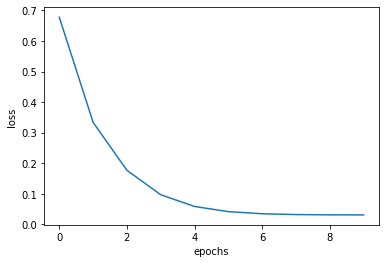

In [39]:
def grader_grad_check(array):
    assert(np.round(array[0],3)==0.678 and np.round(array[-1],3)==0.0310)
    return True 

w_vanilla=np.array([ 0.00244274 ,0.00973789,-0.00504212, 0.00146322,-0.00952112, 0.03329146,
 -0.00042503  ,0.00149911 ,0.0136601 ])
learning_rate=0.001
epochs=10
vanilla_loss_array= vanilla_update(w_vanilla,X,y,learning_rate,epochs)
print(grader_grad_check(vanilla_loss_array))
plt.plot(np.arange(epochs),vanilla_loss_array)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

###<font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [42]:
def momentum_update(w_momentum,X,Y,learning_rate,epochs,v,gamma):
    mean_loss=[]
    for e in range(epochs):
        loss_per_datapoint=0
        for i in range(len(X)):
            #calculate forward propogation
            forward_dict = forward_propagation(X[i], y[i], w_momentum)  
            #adding loss for each datapoint
            loss_per_datapoint+=forward_dict['loss']    
            #calculating gradient dict using backward propogation
            gradients = backward_propagation(X[i],y[i],w_momentum,forward_dict)   
            #getting the values of gradients from dictionary
            dw = np.array(list(gradients.values()))                        
            #you have to write your code here to update weights according to momentum optimizer
            v = (gamma * v) + (learning_rate * dw)
            w_momentum -= v

            
        # we are appending the average loss for all the datapoints
        mean_loss.append(loss_per_datapoint/len(X))
    print(mean_loss)
    return np.array(mean_loss)

In [43]:
def grader_grad_check(array):
    assert(np.round(array[0],3)==0.143 and np.round(array[-1],3)==0.005)
    return True 

w_momentum=np.array([ 0.00244274 ,0.00973789,-0.00504212, 0.00146322,-0.00952112, 0.03329146,
 -0.00042503  ,0.00149911 ,0.0136601 ])

learning_rate=0.001
epochs=10
v=np.zeros(9)                         
m=0.9
momentum_loss_array= momentum_update(w_momentum,X,y,learning_rate,epochs,v,m)
print(grader_grad_check(momentum_loss_array))
plt.plot(np.arange(epochs),momentum_loss_array)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

1.0338710688565633
0.775286746912383
0.5003755088696394
1.159341465309285
-2.153454401940552
4e-06
1.0338540775484908
0.77527996687698
0.500376505566966
1.07514143628416
-2.0737805441118016
1e-05
1.0338874154054578
0.7752932609450119
0.5003760534111099
1.0769369600883585
-2.075511464760779
7e-06
1.0342195763467457
0.7754257249166052
0.5003765048693766
0.8165389921283258
-1.8072509423191079
-1e-06
1.0342854390625278
0.7754519775198124
0.5003830091742066
0.8164479077175333
-1.8071501406552066
2e-06
1.034456254300693
0.7755200614836998
0.5003921071562252
0.8162494517661162
-1.8069304931470012
4e-06
1.033963611045153
0.7753236267191735
0.5004290183269706
1.167636793500595
-2.161144875755066
-7.8e-05
1.033858007264405
0.7752815250340481
0.5004631399368324
1.1674456417321888
-2.1609679698988495
-0.000106
1.0338666337479434
0.7752850305952123
0.5005064534904894
1.1676935563198583
-2.161197405439733
-0.000139
1.0339940068045177
0.7753359520705048
0.5005606557519447
1.165346501664619
-2.1590243

0.26276843989476417
-1.0252188837409584
-0.001206
11.068950001111451
0.9999999995134217
0.5392670155431317
0.2627611108424023
-1.025204586104456
-0.001208
10.834137416294817
0.9999999992217858
0.5392754874101768
0.2627539098155704
-1.025190538028069
-0.00121
10.801415912099472
0.9999999991691717
0.5392855024625534
0.2627468217973478
-1.0251767102257987
-0.001212
11.069017264036637
0.9999999995135186
0.5392969065834653
0.26273983522788075
-1.0251630801543348
-0.001215
11.543903563744
0.9999999998118191
0.5393095611309063
0.2627329402942559
-1.025149628677211
-0.001218
10.206150631007924
0.9999999972677311
0.5393233412036398
0.26272613065964673
-1.0251363434385627
-0.001221
11.93294592492087
0.9999999999135752
0.5393381343701119
0.262719389816269
-1.0251231922384139
-0.001224
12.056959278809527
0.9999999999325608
0.5393538394262243
0.26271271833858434
-1.0251101762027033
-0.001227
12.219170892729952
0.9999999999512464
0.5393703651793027
0.26270610686937873
-1.025097277080334
-0.001231
12

0.5374396389933667
0.5227917645332001
-1.44608680864352
-0.001303
1.3748830389686464
0.8837199225276157
0.5373030612384616
0.4978438634092434
-1.4111610303707276
-0.00128
8.355308012246875
0.9999998932546335
0.4746530579789313
0.21379003231269395
-0.9247486843736388
0.019074
8.132591534212892
0.9999998333636215
0.4741288421263182
0.21369899761929467
-0.9245517781482975
0.019166
9.016305735341763
0.999999971543817
0.47365654969609156
0.2136174776769012
-0.9243754165422211
0.019249
5.649606114372379
0.999976096670726
0.4732312177194393
0.21301825711779937
-0.9230780186263767
0.0193
11.426018799904735
0.9999999997703005
0.47284828192138706
0.21347921190950866
-0.9240762131112534
0.01939
21.069164119819177
1.0
0.4725037071683547
0.21342057259050637
-0.923949289929932
0.019451
15.177480742408045
0.9999999999998733
0.4721937789398359
0.21336793784275393
-0.9238353486260502
0.019504
10.965670624247885
0.9999999994230101
0.4719151309299674
0.2133206467994432
-0.923732963143447
0.019553
21249.8

7503937.67722431
1.0
0.7178698007400253
0.5010080499206834
-1.4156384424289747
-0.070969
4216734.294429961
1.0
0.7209688832663684
0.5235550042054303
-1.4471420168116609
-0.073447
60473742.511322826
1.0
0.7182534100993665
0.5038460082181877
-1.4196422200233236
-0.07128
80941123.8465024
1.0
0.7182627927662625
0.5038423352624386
-1.4196370455330314
-0.071283
61654352.90389235
1.0
0.7210256395361488
0.5235326120897903
-1.447111069807415
-0.073461
97554841.90858161
1.0
0.7210429993254748
0.5235256849638757
-1.4471014960449398
-0.073466
101461480.2036358
1.0
0.7210600626737019
0.5235188761755464
-1.4470920857713878
-0.07347
47679463.18028583
1.0
0.7210768591308078
0.5235121739309552
-1.4470828226897798
-0.073475
5819673.142531101
1.0
0.7134326027500022
0.46267713959010187
-1.3604074971714937
-0.066965
16327983.730992753
1.0
0.7134270111526008
0.4626821238088258
-1.360414824689625
-0.066964
21758194.765490137
1.0
0.7134221835100742
0.4626839347671372
-1.3604174870489385
-0.066963
844673.54848

6.680323838510097e+50
1.0
0.46215262206325164
0.28487509360296837
-1.0674738284435237
0.025535
7.19458158882529e+49
1.0
0.4619602818339246
0.28486647308669144
-1.0674576770751925
0.025565
1.0826042833302632e+51
1.0
0.4617871854309559
0.2848587592193507
-1.0674432241938692
0.025592
8.595663037342745e+28
1.0
0.5755085955148865
0.47220207612444176
-1.374339224681362
-0.013921
2.083383714154228e+29
1.0
0.5754758284633875
0.4721369034857509
-1.374244379265567
-0.013924
8.519223146740137e+28
1.0
0.5754522867598578
0.4720759450027058
-1.374155660764392
-0.013928
3.013595597428913e+29
1.0
0.5754370539188425
0.472018773231659
-1.3740724482088402
-0.013934
2.6333985471163864e+29
1.0
0.5754293039518085
0.47196500468612607
-1.3739941843925338
-0.013941
3.331351602460795e+29
1.0
0.5754282926047619
0.47191429517868927
-1.3739203691316164
-0.013949
2.0828001003857956e+29
1.0
0.5754333493157929
0.47186633571859443
-1.3738505533260805
-0.013958
5.5448238800776154e+29
1.0
0.5754438699505321
0.4718208488

65307700.664060004
1.0
0.49671503886928764
0.2424865050519563
-0.9848583757108558
0.011545
191289953.96288684
1.0
0.4966935571289927
0.2427284604468106
-0.9853496038397958
0.011559
107968809307.8839
1.0
0.49667536990370686
0.2427647089996287
-0.9854231761017775
0.011566
49055511.18355747
1.0
0.4966601483732643
0.2422979739511708
-0.9844754419510338
0.01156
8717392487.59101
1.0
0.4966475953475851
0.24277101286274583
-0.9854359702441267
0.011576
4183630212690.2715
1.0
0.49663744545040994
0.24277322602373277
-0.9854404619736958
0.01158
11428750319910.725
1.0
0.4966294586904792
0.24277489579292974
-0.985443850846774
0.011583
29201078343688.348
1.0
0.49662341895944867
0.24277607643974203
-0.9854462470165322
0.011585
49253714334412.76
1.0
0.496619131781836
0.24277681680358001
-0.9854477496114749
0.011587
37604294664016.11
1.0
0.4966164220320272
0.24277716086980675
-0.9854484479054331
0.011588
1.9564594475665064e+21
1.0
0.6477982654387682
0.5566006134481097
-1.4921134185417806
-0.046021
7.529

0.7628949841484797
0.5637127550893393
-1.5016161361537632
-0.085375
3.421401025772614e+21
1.0
0.7629597849390597
0.563683516439407
-1.5015771927402293
-0.085387
1.0202096965038473e+22
1.0
0.763036229246457
0.563649412905294
-1.5015317684355454
-0.085399
5.886825931137538e+22
1.0
0.7631231393582788
0.563610937177935
-1.5014805189251508
-0.085414
6.809392553678456e+21
1.0
0.7632194544542741
0.5635685331008626
-1.501424034842739
-0.085431
1.1569964629274265e+21
1.0
0.7560738702849116
0.5497402228393694
-1.4828893725957704
-0.082905
6.323611891731501e+21
1.0
0.7561576252815833
0.5497038718425212
-1.4828403445314282
-0.082921
2.2161814487743632e+22
1.0
0.756243696597661
0.5496666189672056
-1.4827900983850757
-0.082937
4.196363001584418e+23
1.0
0.7437359893261405
0.5137323578200731
-1.4335025048043315
-0.077444
4.907041570564437e+23
1.0
0.7437768235461878
0.5137150471900679
-1.4334783530839492
-0.077452
2.0041667083834143e+23
1.0
0.7438159854558756
0.513698478533066
-1.4334552361801411
-0.07

4.9463106086887346e+51
1.0
0.5014953291743284
0.29413889474071014
-1.0846914671752703
0.010692
4.6078484631825195e+50
1.0
0.5014937433586857
0.29413878643687846
-1.0846912674800668
0.010692
5199460.628802229
1.0
0.6651989519677355
0.4521965717355114
-1.3449112561585785
-0.026319
22716.189693394303
1.0
0.6652040092472549
0.4520987014560281
-1.3447657066657048
-0.026317
12263.252936294577
1.0
0.6652097498747941
0.45232885765881414
-1.3451079624458613
-0.026325
135976.6646810207
1.0
0.6652161058293101
0.45100287044967186
-1.3431349454908421
-0.026287
32213.466859155298
1.0
0.665223013778625
0.4519212545647945
-1.344501773245085
-0.026315
244810.96816837133
1.0
0.6652304197240665
0.4508453925904445
-1.3429004320357403
-0.026285
3220399611.2353764
1.0
0.6652382723984561
0.4524158965071811
-1.3452373716295294
-0.026332
1451026.7779008823
1.0
0.40771944737433835
0.2120982635390218
-0.9210825447027466
0.025889
23804.616126613888
1.0
0.4077157567491015
0.21115516302562848
-0.9190324543249351
0.

-0.017665
6.925431635759524e+93
1.0
0.589501681598075
0.4634709837807926
-1.3615740652359571
-0.017672
1.0833067117568735e+93
1.0
0.5895233911876759
0.4634565995281222
-1.3615529362138252
-0.017681
2.095141169847222e+94
1.0
0.5895490064519703
0.4634412783289732
-1.361530430550817
-0.01769
2.4801264466826094e+94
1.0
0.5895781366233123
0.46342511395109914
-1.3615066859198293
-0.017699
5.692314267926495e+92
1.0
0.5896104299776038
0.4634081908178824
-1.361481826272951
-0.01771
5.995439188228869e+94
1.0
0.5896455698134412
0.463390584983926
-1.3614559632745027
-0.017721
7.204939232214033e+94
1.0
0.5896832710809647
0.46337236491720396
-1.3614291974498034
-0.017733
7.95420351108959e+94
1.0
0.5897232770970753
0.46335359230172307
-1.3614016193639893
-0.017745
2.5679745749317646e+93
1.0
0.5897653569620394
0.46333432261474417
-1.3613733104696069
-0.017757
1.0846244507017642e+96
1.0
0.5898093027348533
0.4633146058420118
-1.3613443441569246
-0.01777
2.7282809805581756e+61
1.0
0.3927418713760931
0.00

0.3570230936963966
0.1506104022094229
-0.7761711208475175
0.037033
1.3973240041206536e+44
1.0
0.3570169865772774
0.150611735853323
-0.7761745573086585
0.037034
4.1601245931515953e+40
1.0
0.35701201448182723
0.15061281925593456
-0.7761773489504433
0.037035
6.433319604219298e+36
1.0
0.3570080638919017
0.15061367739635212
-0.7761795601440484
0.037036
2.6349368544348877e+43
1.0
0.35700503264541655
0.150614332935801
-0.7761812492860183
0.037036
1.018784629004529e+41
1.0
0.35700282879987505
0.1506148060054775
-0.7761824682520921
0.037036
1.6721076794513664e+37
1.0
0.3570013696097141
0.15061511488925483
-0.776183264156745
0.037037
3.7579317776918297e+98
1.0
0.7258119467679808
0.5287070523331828
-1.4542448931774632
-0.046736
9.38952243956018e+86
1.0
0.5284121205446373
0.3842560402789502
-1.239767785158092
-2.4e-05
8.934733536239506e+56
1.0
0.5577740520209195
0.3962109296696214
-1.2589057624296132
-0.012407
2.8314817612672975e+67
1.0
0.5577792241433348
0.3962090323066522
-1.2589027481210011
-0.

<ipython-input-31-a6708e9cbfd8>:13: RuntimeWarning: overflow encountered in exp
  part_1 = np.exp(val_1)
<ipython-input-34-37e054a197ff>:20: RuntimeWarning: invalid value encountered in double_scalars
  dw6 = round(dy_pred * (1 - (forward_dict['tanh']**2)) * forward_dict['exp'],6)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


AssertionError: 

<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

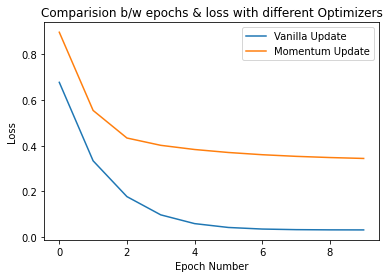

In [477]:

plt.plot(vanilla_loss_array, label = 'Vanilla Update')
plt.plot(momentum_loss_array, label = 'Momentum Update')


plt.title('Comparision b/w epochs & loss with different Optimizers')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers well</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>